## BÀI ÔN TẬP 1 : DATA1_WORLD_HAPPINESS.CSV

### Link 1


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Data Cleaning

In [3]:
# Loading the CSV dataset file
data = pd.read_csv('data1_world_happiness.csv')
print(data.shape)
data.head()


(143, 9)


,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [4]:
# Checks for duplicates
data.duplicated().any()

False

In [5]:
# Checks for missing values if any
data.isnull().sum()

Unnamed: 0         0
country            0
social_support     1
freedom            1
corruption         8
generosity         1
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

In [6]:
# Xử lý null values
data = data.dropna(how='any',axis=0)
# Reset the index
data = data.reset_index(drop=True)
data.isnull().sum()


Unnamed: 0         0
country            0
social_support     0
freedom            0
corruption         0
generosity         0
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

In [7]:
data.describe().round(2)

,Unnamed: 0,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00
mean,73.19,77.91,78.44,73.24,79.56,18532.02,73.56,76.31
std,41.83,46.40,45.80,42.24,44.79,18465.87,7.17,46.81
min,1.00,1.00,1.00,1.00,1.00,631.00,52.90,0.00
25%,38.50,36.50,39.50,37.50,44.50,3795.00,68.80,34.50
50%,73.00,78.00,78.00,74.00,81.00,12100.00,74.70,77.00
75%,109.50,118.50,118.50,109.50,116.50,28800.00,79.50,115.50
max,143.00,155.00,155.00,148.00,155.00,94300.00,85.10,155.00


#### 2. Exploratory Data Analysis (EDA)

##### Univariate Analysis (Phân tích đơn biến)

In [8]:
# Đánh giá top 10 quốc gia hạnh phúc nhất xét về điểm hạnh phúc 
top_5_happinest_countries = data.nlargest(5, 'happiness_score')
top_5_happinest_countries_filtered = top_5_happinest_countries[['country', 'happiness_score']]
print(top_5_happinest_countries_filtered)

       country  happiness_score
0      Finland              155
1      Denmark              154
2       Norway              153
3      Iceland              152
4  Netherlands              151


In [9]:
# Visualisation the top 10 happiest counrties
plt.figure(figsize=(10, 6))
plt.bar(top_10_happinest_countries_filtered['country'], top_10_happinest_countries_filtered['happiness_score'], color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=45)
plt.show()


NameError: name 'top_10_happinest_countries_filtered' is not defined

<Figure size 1000x600 with 0 Axes>

=> Biểu đồ thanh hiển thị 10 quốc gia hạnh phúc nhất, trong đó **Finland** là quốc gia hạnh phúc nhất quốc gia dựa trên điểm hạnh phúc. 

##### Bivariate Analysis (Phân tích hai biến)

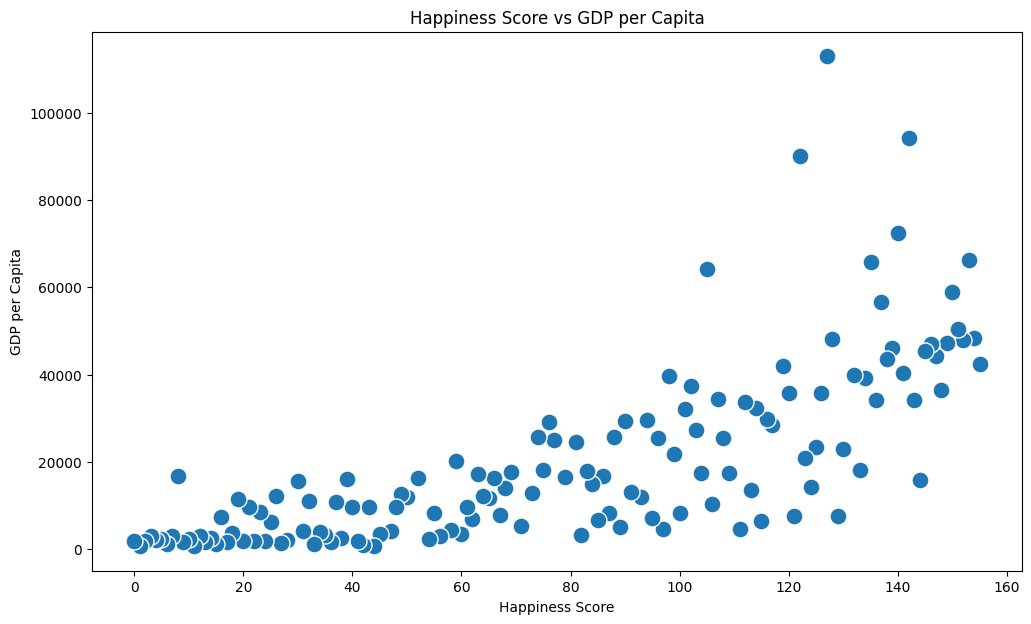

In [ ]:
# Scatter plot of happines_score vs GDP per Capita
sns.scatterplot(x='happiness_score', y='gdp_per_cap', data=data, s = 150)
plt.rcParams['figure.figsize'] = (12, 7)
plt.title('Happiness Score vs GDP per Capita')

plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.show()


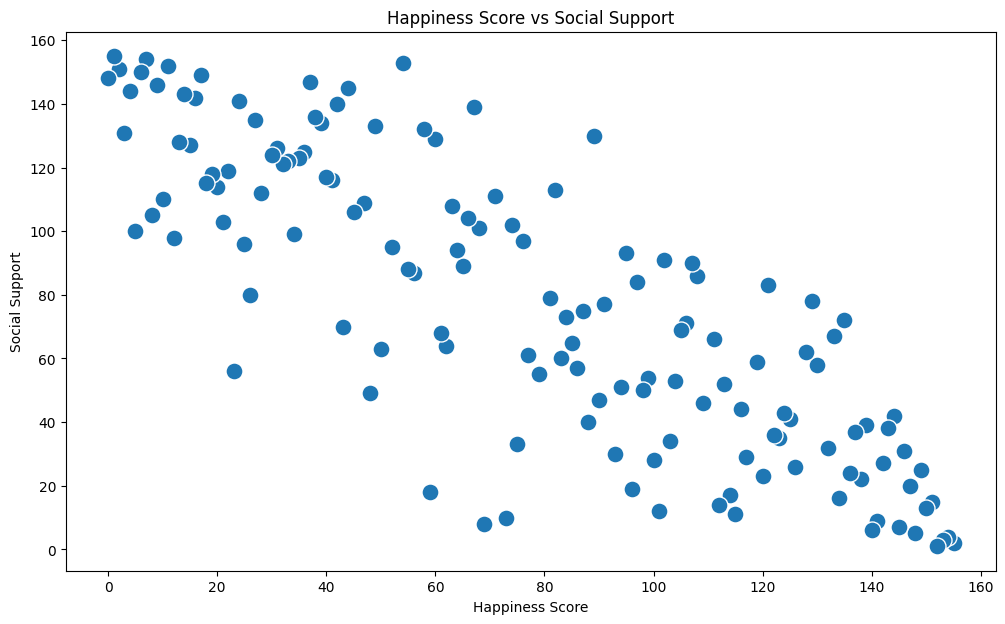

In [ ]:
# Examing happiness score in regards to social support via scatter plot
sns.scatterplot(x='happiness_score', y='social_support', data=data, s = 150)
plt.rcParams['figure.figsize'] = (12, 7)
plt.title('Happiness Score vs Social Support')

plt.xlabel('Happiness Score')
plt.ylabel('Social Support')
plt.show()


##### Multivariate Analysis (Phân tích đa biến)

Text(0, 0.5, 'GDP per Capita')

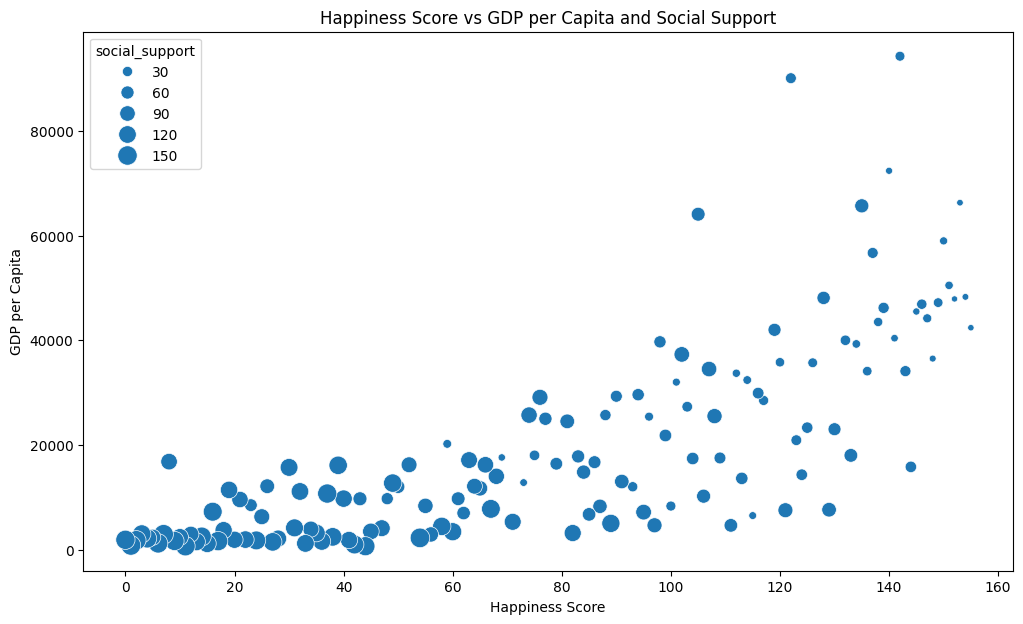

In [ ]:
# Eaxming the effect of Logged GDP per capita and Social support on Hapiness scores
sns.scatterplot(x='happiness_score', y='gdp_per_cap', data=data,size=data["social_support"],
sizes=(20, 200))

plt.rcParams['figure.figsize'] = (12, 7)
plt.title('Happiness Score vs GDP per Capita and Social Support')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')


### Link 2

- Data Exploration & Visualisation
- Classification & Regression
- Data Exploration & Visualisation

#### 1. What are the top factors which affect happiness? Are there any wrong perceived factors about happiness?

In [ ]:
happiness_score = pd.DataFrame(data['happiness_score'])
happiness_score.describe().round(2)

,happiness_score
count,135.00
mean,76.31
std,46.81
min,0.00
25%,34.50
50%,77.00
75%,115.50
max,155.00


Let us classify the Happiness Score into 3 Categories with the help of the Univariate Plots:
1. Unhappy (less than 34.5)
2. Normal / Likely Happy (between 34 and 77)
3. Happy (more than 77)

In [ ]:
# Add our Happiness Category into the Happiness_Score dataframe
happiness = []
for i in happiness_score["happiness_score"]:
    if i < 34.5:
        happiness.append("UNHAPPY")
    elif 34.5<=i<=77:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")
# Join our Hapiness_Score dataframe into the main dataframe
pre_happiness = pd.DataFrame(happiness, columns=["predicted_happiness"])
pre_happiness = pd.DataFrame(pre_happiness["predicted_happiness"].astype('category'))
data = pd.concat([data, pre_happiness], axis=1)   
# Remove any duplicate columns (if any)
data = data.loc[:,~data.columns.duplicated()]
data.head()



,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,predicted_happiness
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155,HAPPY
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154,HAPPY
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153,HAPPY
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152,HAPPY
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151,HAPPY


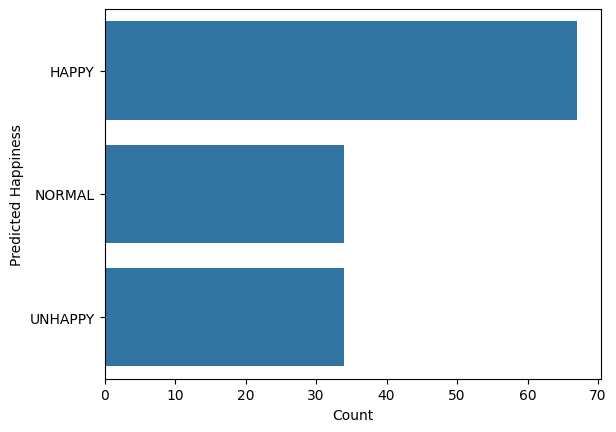

In [ ]:
# Count of Happiness based on our categorisation
data["predicted_happiness"].value_counts()
sns.countplot(data["predicted_happiness"])
plt.ylabel("Predicted Happiness")
plt.xlabel("Count")
plt.show()


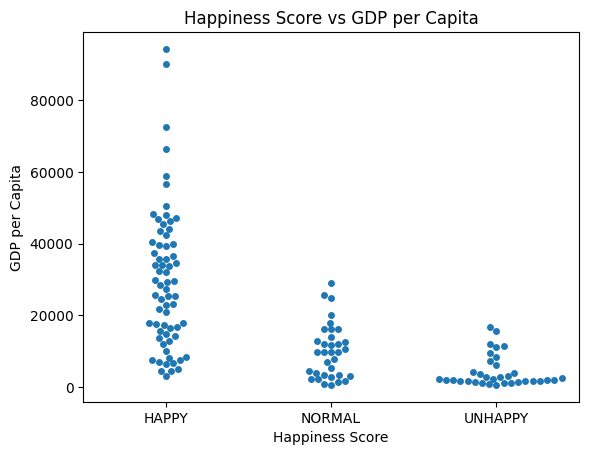

In [ ]:
# Swam plot of Happiness Score vs GDP per Capita
sns.swarmplot(x='predicted_happiness', y='gdp_per_cap', data=data)
plt.rcParams['figure.figsize'] = (12, 7)
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.show()

### Đề thi của Cương

In [ ]:
# 1. Danh sách 5 quốc gia có điểm happiness_score cao nhất
top_5_happinest_countries = data.nlargest(5, 'happiness_score')
top_5_happinest_countries_filtered = top_5_happinest_countries[['country', 'happiness_score']]
print(top_5_happinest_countries_filtered)

       country  happiness_score
0      Finland              155
1      Denmark              154
2       Norway              153
3      Iceland              152
4  Netherlands              151


Mean Of Life Expectancy:  73.56444444444445
Median Of Life Expectancy:  74.7


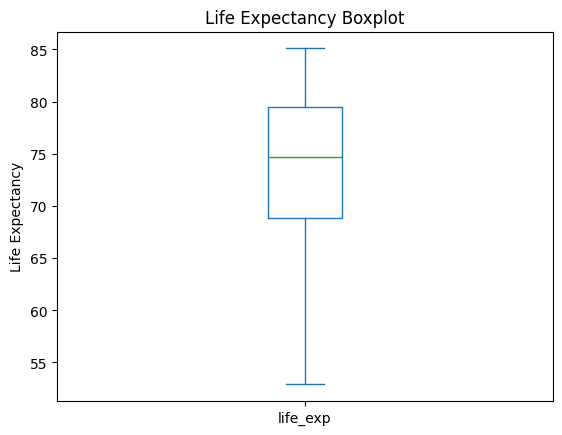

In [ ]:
# 2. Xác định trung bình và trung vị của tuổi thọ (life_exp) và 
# cho biết giá trị nào đại diện tốt hơn cho việc mô tả trung tâm của tuổi thọ
mean_life_exp = data['life_exp'].mean()
median_life_exp = data['life_exp'].median()
print("Mean Of Life Expectancy: ", mean_life_exp)
print("Median Of Life Expectancy: ", median_life_exp)


data['life_exp'].plot(kind='box')
plt.title('Life Expectancy Boxplot')
plt.ylabel('Life Expectancy')
plt.show()



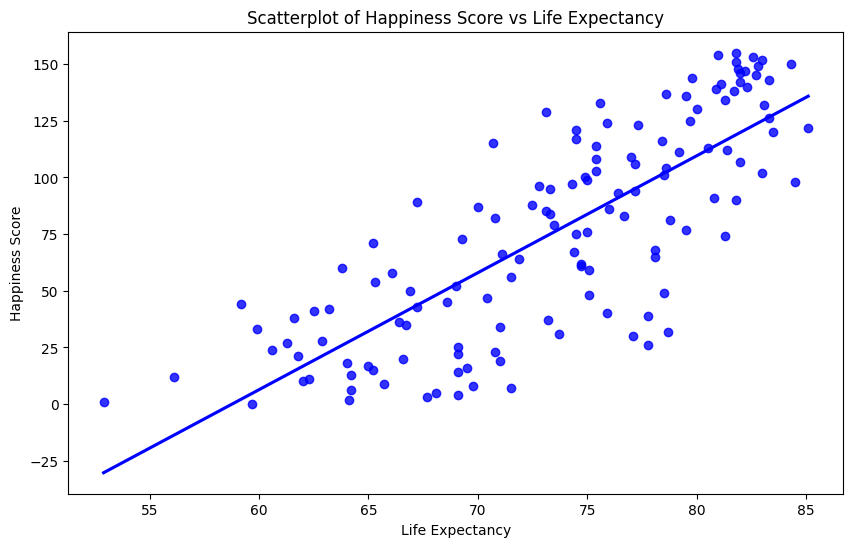

In [ ]:
# 3. Tạo scatterplot của  happiness_score và  life_exp. 
# Tạo scatterplot với đường hồi quy tuyến tính
plt.figure(figsize=(10, 6))
sns.regplot(x='life_exp', y='happiness_score', data=data,
scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'}, ci=None)
# Gán nhãn cho các trục và tiêu đề biểu đồ
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Scatterplot of Happiness Score vs Life Expectancy')
# Hiển thị biểu đồ
plt.show()

In [ ]:
# 4. Tính giá trị tương quan giữa happiness_score và  life_exp
correlation = data['happiness_score'].corr(data['life_exp'])
print(correlation)


0.790377250092346


In [ ]:
# Xác định giá trị trung bình gdp_per_cap. lấy mẫu ngẫu nhiên kích thước 50 với giá trị khởi tạo (seed) là 3 số cuối mssv, 
# tính giá trị trung bình gdp_per_cap của mẫu. 
# So sánh 2 giá trị trung bình

import numpy as np

# Calculate the mean value of gdp_per_cap
mean_gdp_per_cap = data['gdp_per_cap'].mean()

# Set the seed value
np.random.seed(791)

# Take a random sample of size 50 from the data
sample = data['gdp_per_cap'].sample(n=50)

# Calculate the mean value of the sample
mean_sample = sample.mean()

# Compare the two mean values
if mean_sample > mean_gdp_per_cap:
    comparison = "greater than"
elif mean_sample < mean_gdp_per_cap:
    comparison = "less than"
else:
    comparison = "equal to"

# Print the results
print("Mean value of gdp_per_cap: ", mean_gdp_per_cap)
print("Mean value of the sample: ", mean_sample)
print("The mean value of the sample is", comparison, "the mean value of gdp_per_cap.")

Mean value of gdp_per_cap:  18532.022222222222
Mean value of the sample:  22060.56
The mean value of the sample is greater than the mean value of gdp_per_cap.


In [ ]:
# 6. Xác dịnh happiness_score dùng knn
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

world_happiness = data.dropna(subset=['social_support',

'freedom', 'corruption', 'generosity', 'gdp_per_cap', 'life_exp',

'happiness_score'])

# Chia dữ liệu thành features (X) và label (y)

X = world_happiness[['social_support', 'freedom', 'corruption',

'generosity', 'gdp_per_cap', 'life_exp']]

y = world_happiness['happiness_score']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(X, y,

test_size=0.2, random_state=42)

# Huấn luyện mô hình KNN

k = 3 # Số lượng láng giềng gần nhất

knn = KNeighborsRegressor(n_neighbors=k)

knn.fit(X_train, y_train)

# Dự đoán happiness_score trên dữ liệu kiểm tra

y_pred = knn.predict(X_test)
print(y_pred)

# Đánh giá hiệu suất của mô hình

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

[ 30.33333333  81.          83.         115.          49.66666667
 108.33333333 115.          14.33333333  18.33333333  34.
  93.          81.          90.66666667  48.33333333  34.
 127.          81.         151.66666667  12.33333333 118.33333333
  61.33333333 103.33333333 149.         152.         147.33333333
  84.66666667 136.        ]


In [ ]:
# Data2_ homelessness
# 7. Xuất ra kết quả


## BÀI ÔN TẬP 2 : DATA2_HOMELESSNESS.CSV

In [ ]:
# Inspecting a DataFrame
data2 = pd.read_csv('data2_homelessness.csv')
print(data2.shape)
print(data2.describe().round(2))
data2.head()

(51, 6)
       Unnamed: 0  individuals  family_members    state_pop
count       51.00        51.00           51.00        51.00
mean        25.00      7225.78         3504.88   6405637.27
std         14.87     15991.03         7805.41   7327257.81
min          0.00       434.00           75.00    577601.00
25%         12.50      1446.50          592.00   1777413.50
50%         25.00      3082.00         1482.00   4461153.00
75%         37.50      6781.50         3196.00   7340946.50
max         50.00    109008.00        52070.00  39461588.00


,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [ ]:
# Parts of a DataFrame
# print(data2.values)
print(data2.columns)
print(data2.index)

Index(['Unnamed: 0', 'region', 'state', 'individuals', 'family_members',
       'state_pop'],
      dtype='object')
RangeIndex(start=0, stop=51, step=1)


In [ ]:
# Sorting rows
# Sort data2 by indiviual
data2_ind = data2.sort_values('individuals', ascending=False)
# Sort data2 by family_members
data2_fam = data2.sort_values('family_members', ascending=False)
# Sort data2 by region, then descending by family_members
data2_reg_fam = data2.sort_values(['region', 'family_members'], ascending=[True, False])
data2_reg_fam.head()


,Unnamed: 0,region,state,individuals,family_members,state_pop
13,13,East North Central,Illinois,6752.0,3891.0,12723071
35,35,East North Central,Ohio,6929.0,3320.0,11676341
22,22,East North Central,Michigan,5209.0,3142.0,9984072
49,49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,14,East North Central,Indiana,3776.0,1482.0,6695497


In [ ]:
# SUBSETTING COLUMNS
# Select the individuals column
individuals = data2['individuals']

# Select the state and family_members columns
state_fam = data2[['state', 'family_members']]
state_fam.head()

# Select only the individuals and state columns, in that order
ind_state = data2[['individuals', 'state']]
ind_state.head()

,individuals,state
0,2570.0,Alabama
1,1434.0,Alaska
2,7259.0,Arizona
3,2280.0,Arkansas
4,109008.0,California


In [ ]:
# SUBNETTING ROWS
# Filter for rows where individuals is greater than 10000
ind_gt_10k = data2[data2['individuals'] > 10000]
# Filter for rows where region is Mountain
mountain_reg = data2[data2['region'] == 'Mountain']
# Filter for rows where family_members is less than 1000 and region is Pacific
fam_lt_1k_pac = data2[(data2['family_members'] < 1000) & (data2['region'] == 'Pacific')]
fam_lt_1k_pac.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
1,1,Pacific,Alaska,1434.0,582.0,735139


In [ ]:
# SUBNETTING ROWS BY CATEGORICAL VARIABLES

# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = data2[data2['region'].isin(['South Atlantic', 'Mid-Atlantic'])]
print(south_mid_atlantic)

# The Mojave Desert states
# canu = ['California', 'Arizona', 'Nevada', 'Utah']
# mojave_homelessness = data2[data2['state'].isin(canu)]
# print(mojave_homelessness)

    Unnamed: 0          region                 state  individuals  \
7            7  South Atlantic              Delaware        708.0   
8            8  South Atlantic  District of Columbia       3770.0   
9            9  South Atlantic               Florida      21443.0   
10          10  South Atlantic               Georgia       6943.0   
20          20  South Atlantic              Maryland       4914.0   
30          30    Mid-Atlantic            New Jersey       6048.0   
32          32    Mid-Atlantic              New York      39827.0   
33          33  South Atlantic        North Carolina       6451.0   
38          38    Mid-Atlantic          Pennsylvania       8163.0   
40          40  South Atlantic        South Carolina       3082.0   
46          46  South Atlantic              Virginia       3928.0   
48          48  South Atlantic         West Virginia       1021.0   

    family_members  state_pop  
7            374.0     965479  
8           3134.0     701547  
9     

In [ ]:
# ADDING NEW COLUMNS

# Add total col as sum of individuals and family_members
data2['total'] = data2['individuals'] + data2['family_members']
# Add p_individuals col as proportion of individuals
data2['p_individuals'] = data2['individuals'] / data2['total']
data2.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop,total,p_individuals
0,0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [ ]:
# COMBO - ATTACK
# Create indiv_per_10k col as individuals per 10k state pop
data2['indiv_per_10k'] = 10000 * data2['individuals'] / data2['state_pop']
# Subnet rows for indiv_per_10k greater than 20
high_homelessness = data2[data2['indiv_per_10k'] > 20]
# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)
# From high_homelessness_srt, subset the state and indiv_per_10k cols
result = high_homelessness_srt[['state', 'indiv_per_10k']]
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


## BÀI ÔN TẬP 3 : DATA3_MUSIC_CLEAN.CSV

In [ ]:
# 1.Import
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 
from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")
import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
data3 = pd.read_csv('data3_music_clean.csv')
data3.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [ ]:
# 2.Viewing Dataset
data3.describe().round(2)
print(data3.keys())

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')


Text(0.5, 1.0, 'Popularity Distribution')

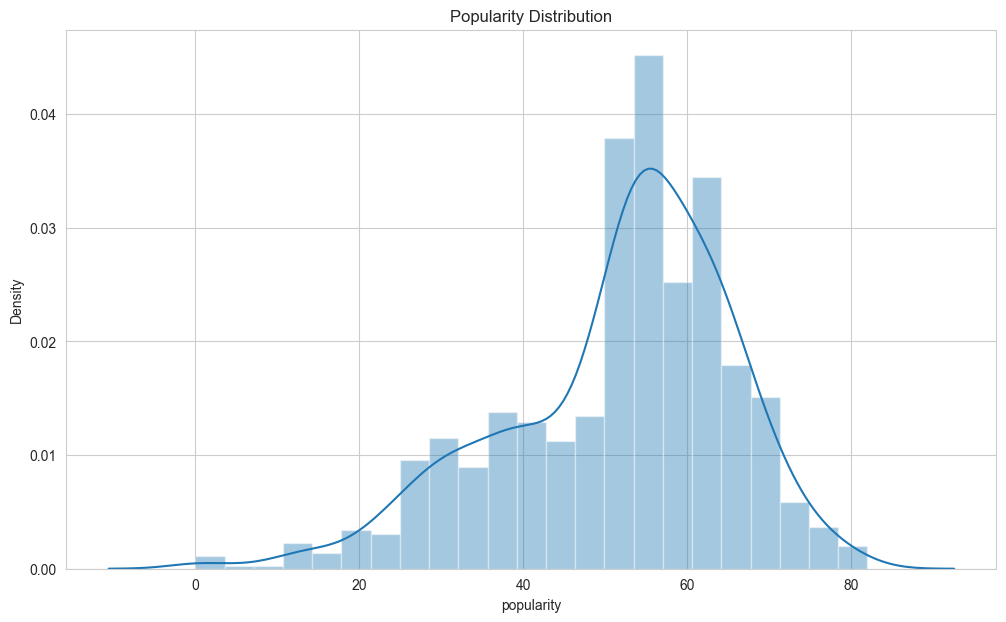

In [ ]:
# 3. We check for null values
data3.isnull().sum()
sns.distplot(data3['popularity']).set_title('Popularity Distribution')

In [ ]:
# 4. Exploratoring the overall trends in the data to get an idea of dependency of popularity with features like mode, key, acousticness,etc.
popular_above_50 = data3[data3['popularity'] > 50]
popular_below_50 = data3[data3['popularity'] < 50]


,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
58,36675,49.0,0.005910,0.356,193213.0,0.837,0.000028,0.0635,-4.166,0.0721,131.668000,0.5400,1
74,36006,49.0,0.094600,0.419,281000.0,0.748,0.000174,0.0916,-8.142,0.0521,85.020000,0.4170,1
140,38703,47.0,0.520000,0.561,184632.0,0.715,0.000000,0.1190,-6.344,0.0417,153.956000,0.4530,1
147,38585,48.0,0.001040,0.507,182987.0,0.959,0.000000,0.1470,-4.763,0.1180,165.136000,0.4360,1
174,35477,49.0,0.000821,0.343,217440.0,0.890,0.000000,0.0912,-5.759,0.0655,100.061000,0.5250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,33345,26.0,0.379000,0.570,282373.0,0.949,0.351000,0.0928,-3.529,0.1180,119.952961,0.8070,0
990,21403,37.0,0.046800,0.513,230040.0,0.701,0.000005,0.3490,-5.592,0.0281,144.944000,0.3020,0
992,28567,47.0,0.023700,0.682,241120.0,0.523,0.000000,0.1800,-9.690,0.3350,170.049000,0.3660,0
994,9233,13.0,0.812000,0.615,109107.0,0.229,0.953000,0.1650,-18.944,0.0472,184.591000,0.0863,0


In [ ]:
# 6. Prediction
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']

In [ ]:
# 9. Xác định trung bình, trung vị, độ lệch chuẩn, tứ phân vị cho popularity
# Calculate the mean
mean_popularity = data3['popularity'].mean()

# Calculate the median
median_popularity = data3['popularity'].median()

# Calculate the standard deviation
std_popularity = data3['popularity'].std()

# Calculate the quartiles
quartiles = data3['popularity'].quantile([0.25, 0.5, 0.75])

# Print the results
print("Mean of popularity:", mean_popularity)
print("Median of popularity:", median_popularity)
print("Standard deviation of popularity:", std_popularity)
print("Quartiles of popularity:")
print(quartiles)



Mean of popularity: 51.66
Median of popularity: 54.0
Standard deviation of popularity: 14.028585146093715
Quartiles of popularity:
0.25    43.75
0.50    54.00
0.75    62.00
Name: popularity, dtype: float64


In [ ]:
# 10. Xác định các ngoại lệ (outlier) dùng IQR cho 1 biến định lượng tùy chọn
# Calculate the IQR of the variable
Q1 = data3['popularity'].quantile(0.25)
Q3 = data3['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data3[(data3['popularity'] < lower_bound) | (data3['popularity'] > upper_bound)]

# Print the outliers
print(outliers['popularity'])

519    16.0
522    12.0
535    13.0
547     0.0
565    16.0
569    13.0
572    16.0
584     0.0
585     0.0
633    13.0
723     8.0
728    12.0
768    15.0
805    11.0
810    16.0
900    13.0
928     2.0
930     6.0
994    13.0
Name: popularity, dtype: float64


## BÀI ÔN TẬP 4 : FOOD_CONSUMPTION.CSV

#### 1. Tạo 1 pandas DataFrame co ten food_consumption chứa dữ liệu load từ food_consumption.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('food_consumption.csv')
df.head()
df.duplicated().any()
df.isnull().sum()

Unnamed: 0       0
country          0
food_category    0
consumption      0
co2_emission     0
dtype: int64

#### 2. Tạo 2 pandas DataFrame: một cho dữ liệu của nước 'Belgium' tên là be_consumption và 1 cho du liệu của nước 'USA' tên là usa_consumption

In [ ]:
be_consumption = df[df['country'] == 'Belgium']
print(be_consumption)
usa_consumption = df[df['country'] == 'USA']
print(usa_consumption)

     Unnamed: 0  country food_category  consumption  co2_emission
396         397  Belgium          pork        38.65        136.80
397         398  Belgium       poultry        12.20         13.11
398         399  Belgium          beef        15.63        482.31
399         400  Belgium     lamb_goat         1.32         46.23
400         401  Belgium          fish        18.97         30.29
401         402  Belgium          eggs        12.59         11.57
402         403  Belgium         dairy       236.19        336.43
403         404  Belgium         wheat       111.91         21.34
404         405  Belgium          rice         8.61         11.02
405         406  Belgium      soybeans         0.07          0.03
406         407  Belgium          nuts         7.32         12.96
    Unnamed: 0 country food_category  consumption  co2_emission
55          56     USA          pork        27.64         97.83
56          57     USA       poultry        50.01         53.72
57          58  

#### 3. Tính trung bình, trung vị của lượng thức ăn (kg) tiêu thụ của mỗi người trong 2 quốc gia trên (cột consumption)

In [ ]:
be_consumption_mean = be_consumption["consumption"].mean()
be_consumption_std = be_consumption["consumption"].std()

usa_consumption_mean = usa_consumption["consumption"].mean()
usa_consumption_std = usa_consumption["consumption"].std()  

print(be_consumption_mean, be_consumption_std)
print(usa_consumption_mean, usa_consumption_std)

42.13272727272727 71.63624823940867
44.650000000000006 73.796233101697


#### 4. Tạo pandas DataFrame chứa dữ liệu của cả Belgium và USA, đặt tên là food_consumption

In [ ]:
food_consumption = df[df['country'].isin(['Belgium', 'USA'])]
food_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
55,56,USA,pork,27.64,97.83
56,57,USA,poultry,50.01,53.72
57,58,USA,beef,36.24,1118.29
58,59,USA,lamb_goat,0.43,15.06
59,60,USA,fish,12.35,19.72
60,61,USA,eggs,14.58,13.39
61,62,USA,dairy,254.69,362.78
62,63,USA,wheat,80.43,15.34
63,64,USA,rice,6.88,8.80
64,65,USA,soybeans,0.04,0.02


#### 5. Tính trung bình và trung vị của lượng thức ăn (kg) tiêu thụ của mỗi người trong 2 quốc gia trên (cột consumption) dùng groupby và agg

In [ ]:
mean_consumption = food_consumption.groupby('country')['consumption'].mean()
median_consumption = food_consumption.groupby('country')['consumption'].median()

print("Mean Consumption:")
print(mean_consumption)

print("Median Consumption:")
print(median_consumption)


Mean Consumption:
country
Belgium    42.132727
USA        44.650000
Name: consumption, dtype: float64
Median Consumption:
country
Belgium    12.59
USA        14.58
Name: consumption, dtype: float64


#### 6. Tạo pandas DataFrame chứa các hàng có loại thực phẩm (food_category ) là 'rice'

In [ ]:
food_category = df[df["food_category"] == "rice"]
food_category

,Unnamed: 0,country,food_category,consumption,co2_emission
8,9,Argentina,rice,8.77,11.22
19,20,Australia,rice,11.03,14.12
30,31,Albania,rice,7.78,9.96
41,42,Iceland,rice,3.89,4.98
52,53,New Zealand,rice,9.16,11.72
...,...,...,...,...,...
1383,1384,Sierra Leone,rice,103.30,132.19
1394,1395,Sri Lanka,rice,109.72,140.41
1405,1406,Indonesia,rice,134.62,172.27
1416,1417,Liberia,rice,94.75,121.25


#### 7. Tạo histogram của co2_emission cho 'rice'

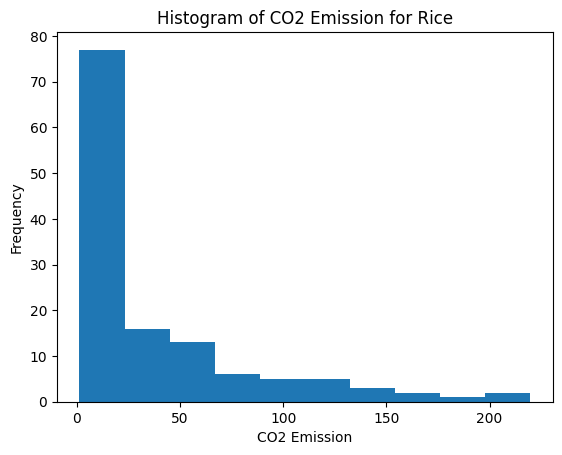

In [ ]:
rice_emission = food_category[food_category['food_category'] == 'rice']['co2_emission']
plt.hist(rice_emission)
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emission for Rice')
plt.show()


#### 8. Tính tứ phân vị (quartiles) của cột co2_emission

In [ ]:
#### 8. Tính tứ phân vị (quartiles) của cột co2_emission
quaertiles = food_category['co2_emission'].quantile([0.25, 0.5, 0.75])
quaertiles


0.25     6.0425
0.50    15.2000
0.75    55.5925
Name: co2_emission, dtype: float64

#### 9. Tính ngũ phân vị (quintiles) của cột co2_emission



In [ ]:
quintiles = food_consumption['co2_emission'].quantile([0.2, 0.4, 0.6, 0.8])
quintiles

0.2     11.848
0.4     14.370
0.6     26.710
0.8    129.006
Name: co2_emission, dtype: float64

#### 10. Tính các phân vị (quantiles) của cột co2_emission mà chia dữ liệu thành 10 phần bằng nhau

In [ ]:
quantiles = food_consumption['co2_emission'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
quantiles

0.1      9.022
0.2     11.848
0.3     13.194
0.4     14.370
0.5     17.530
0.6     26.710
0.7     51.473
0.8    129.006
0.9    360.145
Name: co2_emission, dtype: float64

#### 11. Tính phương sai ( variance) và độ lệch chuẩn (standard deviation) của co2_emission bằng groupby và .agg

In [ ]:
variance_co2_emission = food_consumption.groupby('country')['co2_emission'].var()
standard_deviation_co2_emission = food_consumption.groupby('country')['co2_emission'].std()

print("Variance of CO2 Emission:")
print(variance_co2_emission)

print("Standard Deviation of CO2 Emission:")
print(standard_deviation_co2_emission)




Variance of CO2 Emission:
country
Belgium     25820.91564
USA        112735.05544
Name: co2_emission, dtype: float64
Standard Deviation of CO2 Emission:
country
Belgium    160.688878
USA        335.760414
Name: co2_emission, dtype: float64


#### 12. Tạo histogram của co2_emission cho loại thực phẩm (food_category ) là beef

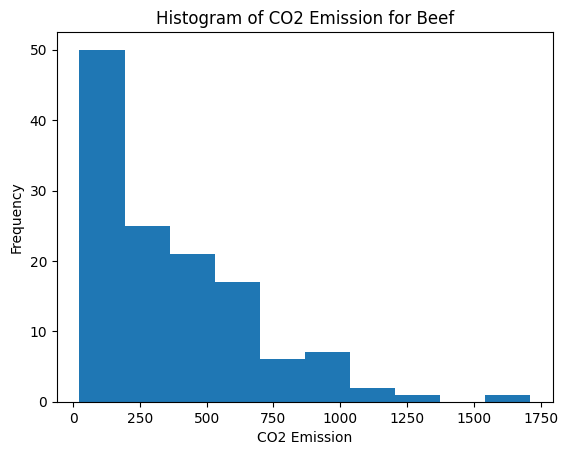

297.90671045211974

In [ ]:
beef_emission = df[df['food_category'] == 'beef']['co2_emission']
plt.hist(beef_emission)
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emission for Beef')
plt.show()

beef_std = df[df['food_category'] == 'beef']['co2_emission'].std()
beef_std


#### 13. Tạo histogram cua co2_emission cho loại thực phấm (food_category ) là beef

#### 14. Tạo histogram của co2_emission cho loại thực phẩm (food_category ) là eggs

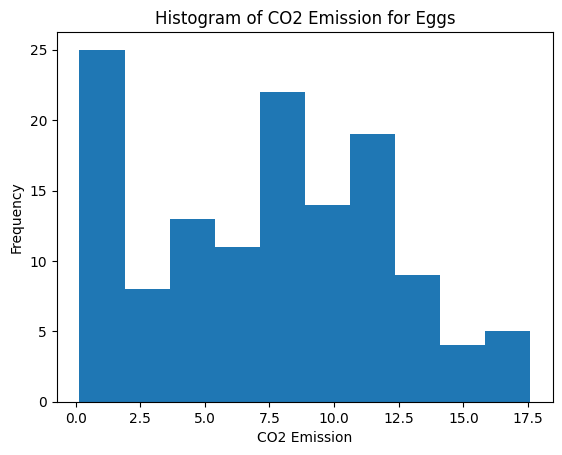

In [ ]:
eggs_emission = df[df['food_category'] == 'eggs']['co2_emission']
plt.hist(eggs_emission)
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emission for Eggs')
plt.show()

#### 15. Tính tổng co2_emission cho mỗi quốc gia và lưu vào pandas DataFrame có tên emissions_by_country.

In [ ]:
emission_by_country = df.groupby('country')['co2_emission'].sum()
emission_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

#### 16. Tính tứ phân vị thứ nhất và thứ 3 của emissions_by_country và lưu vào q1 và q3

In [ ]:
q1 = emission_by_country.quantile(0.25)
q3 = emission_by_country.quantile(0.75)
print(q1, q3)

446.66 1111.1525000000001


#### 17. Tính điểm cắt dưới và trên (lower and upper cutoffs) cho outlier của emissions_by_country và lưu vào lower và upper

In [ ]:
IQR = q3 - q1

lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

print("Lower Cutoff:", lower)
print("Upper Cutoff:", upper)


Lower Cutoff: -550.0787500000001
Upper Cutoff: 2107.89125


#### 18. Xác định các outlier (có emissions_by_country < lower hoặc emissions_by_country > upper) 

In [ ]:
outlier = emission_by_country[(emission_by_country < lower) | (emission_by_country > upper)]
outlier

country
Argentina    2172.4
Name: co2_emission, dtype: float64

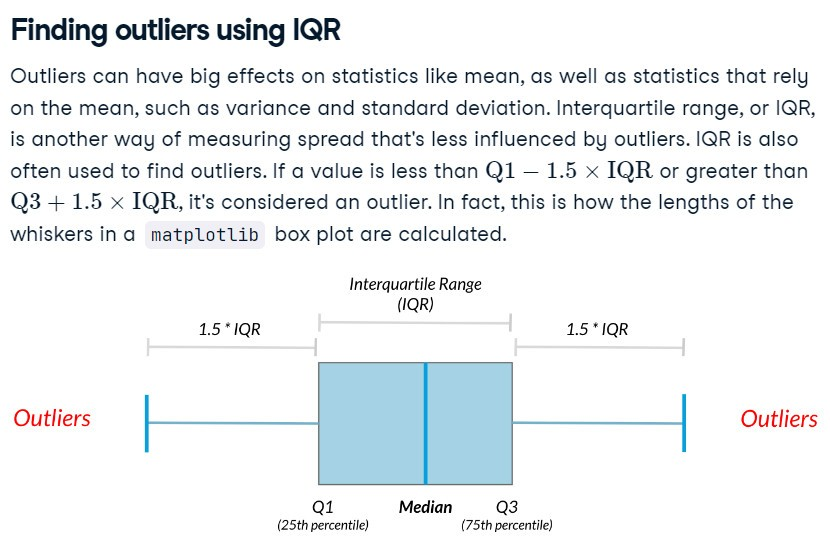

## BÀI ÔN TẬP 5 : ĐỀ THI

In [ ]:
# 1.2 Danh sách 5 quốc gia có tuổi thọ (life_exp) cao nhất
top_5_life_exp_countries = data.nlargest(5, 'life_exp')
top_5_life_exp_countries_filtered = top_5_life_exp_countries[['country', 'life_exp']]
print(top_5_life_exp_countries_filtered)


        country  life_exp
29    Singapore      85.1
49        Japan      84.5
5   Switzerland      84.3
31        Italy      83.5
12       Israel      83.3


Mean Of GDP Per Capita:  18532.022222222222
Median Of GDP Per Capita:  12100.0


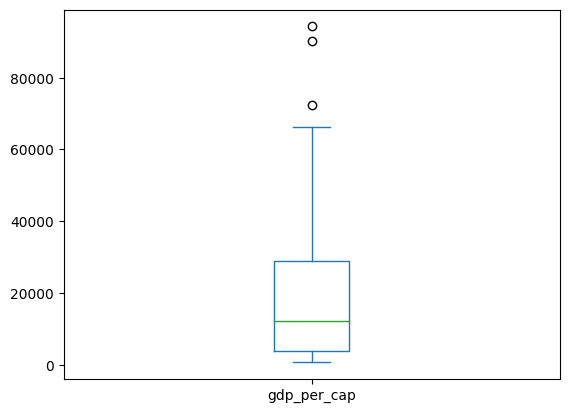

In [ ]:
# 2.2 Xác định trung bình và trung vị của gdp_per_cap và cho biết giá trị nào đại diện tốt hơn cho việc mô tả trung tâm gdp_per_cap
mean_gdp_per_cap = data['gdp_per_cap'].mean()
median_gdp_per_cap = data['gdp_per_cap'].median()
print("Mean Of GDP Per Capita: ", mean_gdp_per_cap)
print("Median Of GDP Per Capita: ", median_gdp_per_cap)

data['gdp_per_cap'].plot(kind='box')
plt.show()

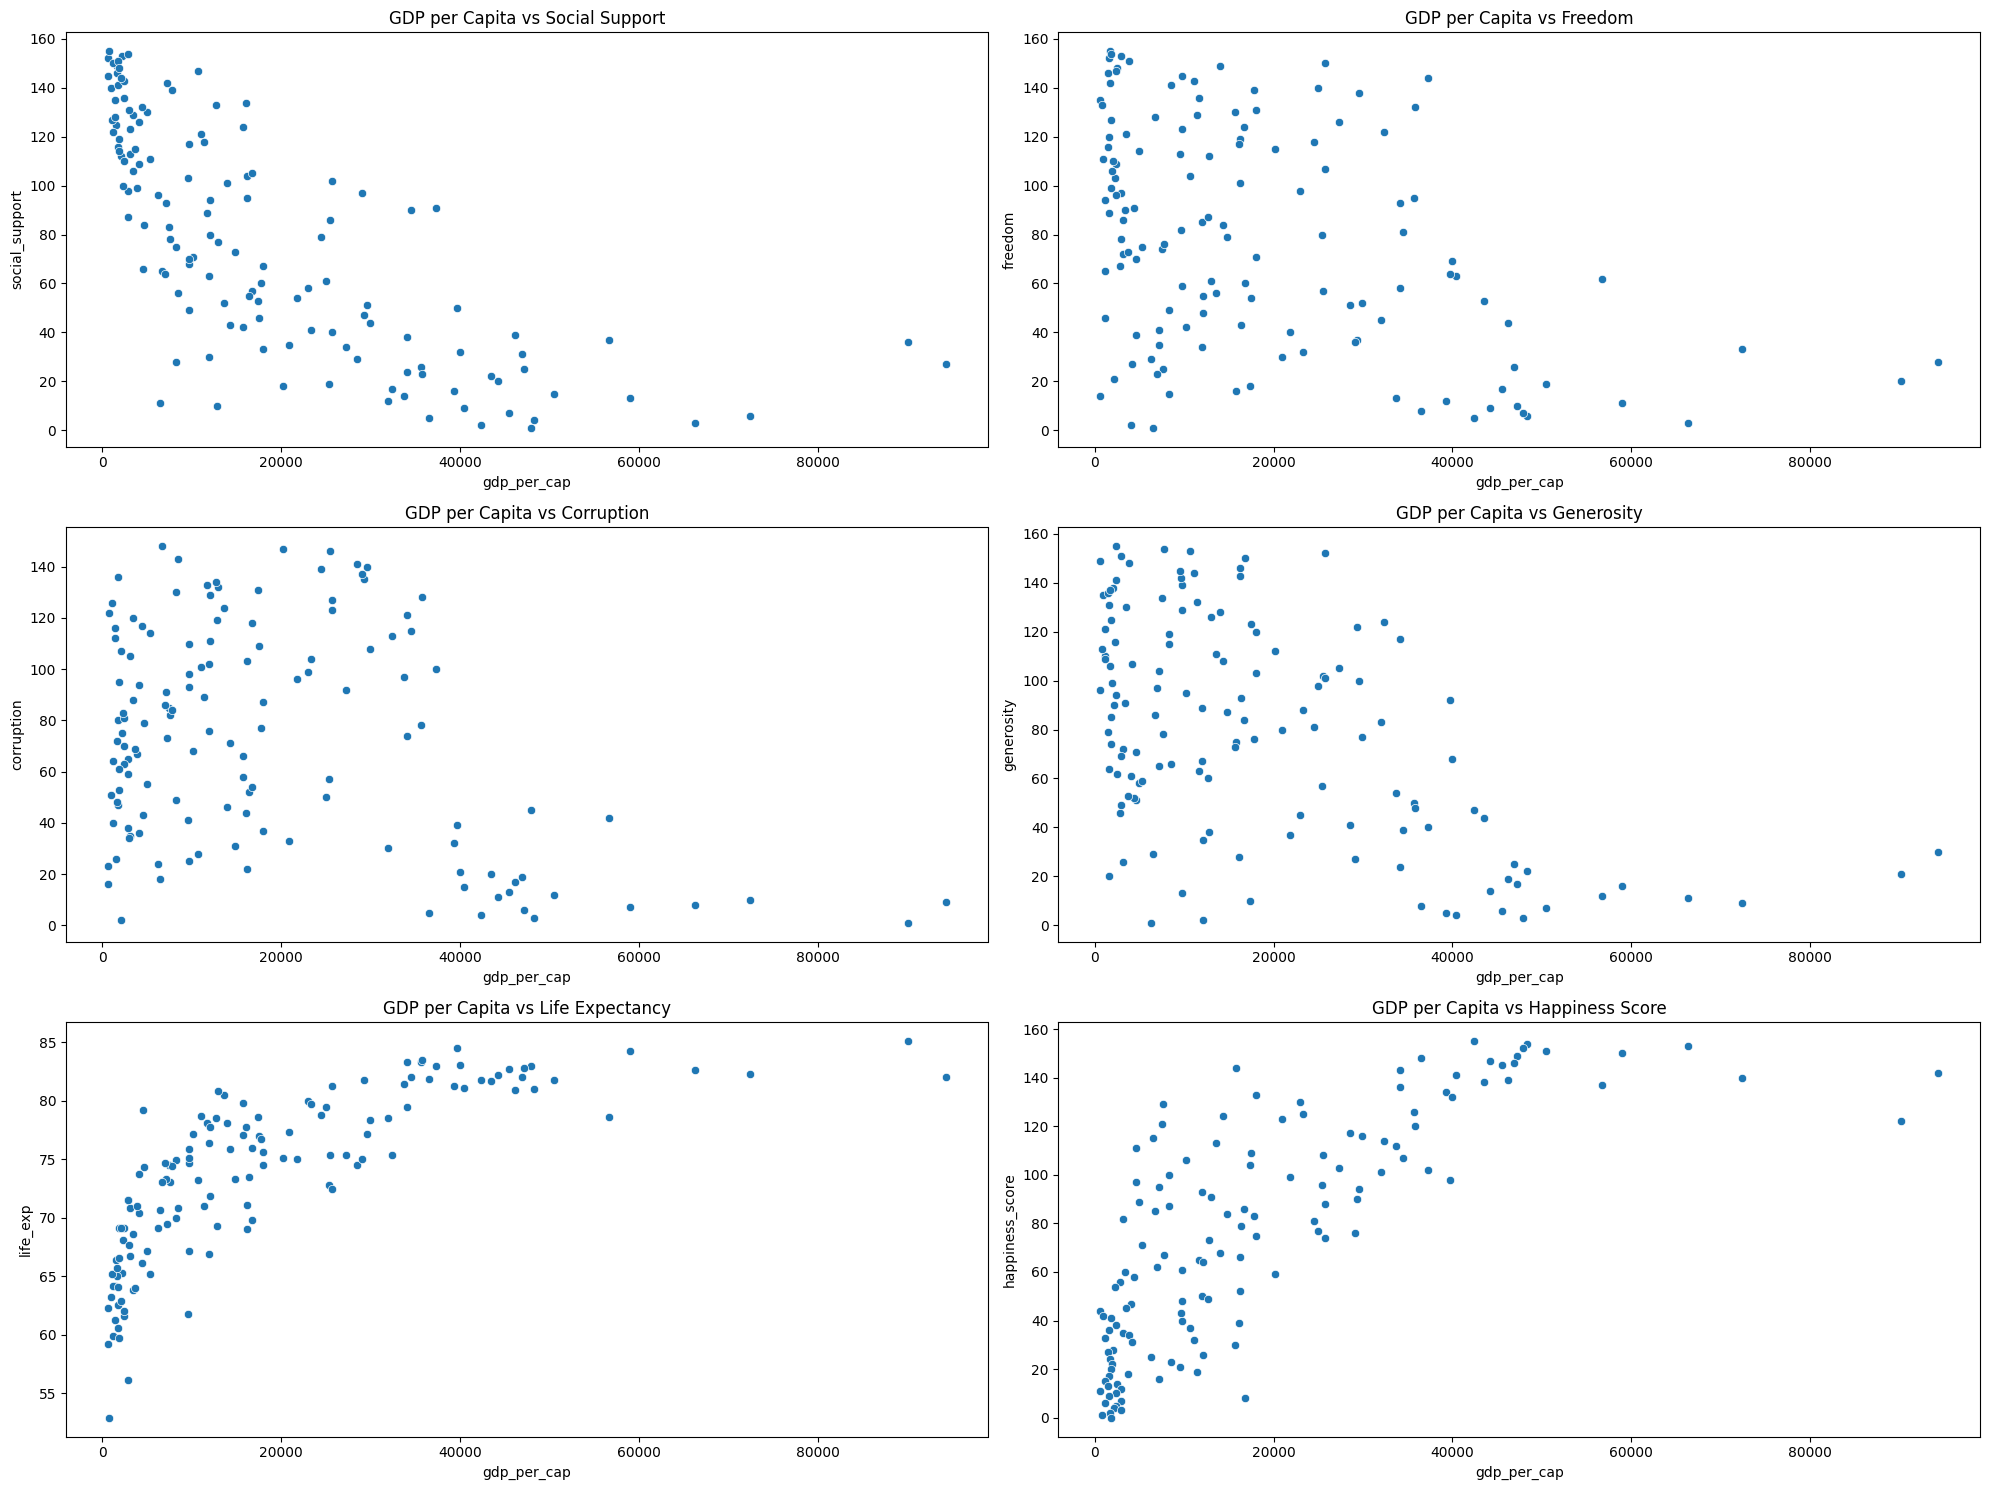

In [ ]:
# 3.2 Trực quan sự tương quan giữa gdp_per_cap với các nhân tố khác 

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
sns.scatterplot(x='gdp_per_cap', y='social_support', data=data, ax=axes[0, 0])
axes[0, 0].set_title('GDP per Capita vs Social Support')

sns.scatterplot(x='gdp_per_cap', y='freedom', data=data, ax=axes[0, 1])
axes[0, 1].set_title('GDP per Capita vs Freedom')

sns.scatterplot(x='gdp_per_cap', y='corruption', data=data, ax=axes[1, 0])
axes[1, 0].set_title('GDP per Capita vs Corruption')

sns.scatterplot(x='gdp_per_cap', y='generosity', data=data, ax=axes[1, 1])
axes[1, 1].set_title('GDP per Capita vs Generosity')

sns.scatterplot(x='gdp_per_cap', y='life_exp', data=data, ax=axes[2, 0])
axes[2, 0].set_title('GDP per Capita vs Life Expectancy')

sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=data, ax=axes[2, 1])
axes[2, 1].set_title('GDP per Capita vs Happiness Score')

plt.tight_layout()
plt.show()




In [ ]:
# 4.2 Tính giá trị tương quan giữa happiness_score và các nhân tố khác
correlation1 = data['happiness_score'].corr(data['life_exp'])
correlation2 = data['happiness_score'].corr(data['gdp_per_cap'])
correlation3 = data['happiness_score'].corr(data['social_support'])
correlation4 = data['happiness_score'].corr(data['freedom'])
correlation5 = data['happiness_score'].corr(data['corruption'])
correlation6 = data['happiness_score'].corr(data['generosity'])

print(correlation1)
print(correlation2)
print(correlation3)
print(correlation4)
print(correlation5)
print(correlation6)


0.790377250092346
0.7535135096083174
-0.8394050407676249
-0.5621149001734871
-0.215308453383389
-0.4919349042203437


In [ ]:
# 5.2 Xác định giá trị trung  bình, độ lệch chuẩn của happiness_score. Lấy mẫu ngẫu nhiên kích thước 50 với giá trị khởi tạo (seed) là 791, tính giá trị trung bình và độ lệch chuẩn happiness_score của mẫu.
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(791)

# Take a random sample of size 50 from the happiness_score column
sample = data['happiness_score'].sample(n=50)

# Calculate the mean and standard deviation of the sample
sample_mean = sample.mean()
sample_std = sample.std()

# Print the results
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)

Sample Mean: 79.46
Sample Standard Deviation: 47.32139784365579


Hệ số hồi quy: [4.9690269]
Sai số: -289.55391793330745


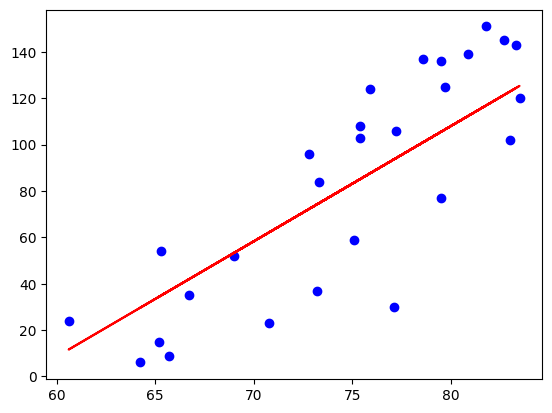

Sai số bình phương trung bình: 719.4950493962913
Happiness score của người sống đến tuổi 70 là: 58.27796508240846


In [ ]:
# 6.2 Xác dịnh happiness_score dựa vào tuổi thọ life_exp dùng hồi quy tuyến tính
# 6.2.1 Xác định hệ số hồi quy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X = data['life_exp'].values.reshape(-1, 1)
y = data['happiness_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Hệ số hồi quy:', model.coef_)
print('Sai số:', model.intercept_)

# 6.2.2 Dự đoán happiness_score
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.show()

# 6.2.3 Đánh giá mô hình
print('Sai số bình phương trung bình:', mean_squared_error(y_test, y_pred))

# 6.2.4 Dự đoán happiness_score dựa vào life_exp
life_exp = 70
happiness_score = model.predict([[life_exp]])
print('Happiness score của người sống đến tuổi', life_exp, 'là:', happiness_score[0])


In [ ]:
# 8.2 Xuất ra kết quả
canu = ['California', 'Arizona', 'Nevada', 'Utah']
mojave_homelessness = data2[data2['state'].isin(canu)]
print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


## BÀI ÔN TẬP 6 : ĐỀ THI

In [17]:
data1 = pd.read_csv("data1_world_happiness.csv")
data2 = pd.read_csv("data2_homelessness.csv")
data3 = pd.read_csv("data3_music_clean.csv")

In [11]:
# 1.Danh sách 5 quốc gia có tuổi thọ (life_exp) cao nhất
top_5_life_exp_countries = data1.nlargest(5, 'life_exp')
top_5_life_exp_countries_filtered = top_5_life_exp_countries[['country', 'life_exp']]
print(top_5_life_exp_countries_filtered)


        country  life_exp
32    Singapore      85.1
54        Japan      84.5
5   Switzerland      84.3
34        Italy      83.5
12       Israel      83.3


In [36]:
data1.isnull().sum()

Unnamed: 0         0
country            0
social_support     1
freedom            1
corruption         8
generosity         1
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

In [41]:
# 2. Thay thế các giá trị null (NA) bằng giá trị trung bình của cột 
columns_to_fill = ["social_support", "freedom", "corruption", "generosity"]
for column in columns_to_fill:
    data1[column].fillna(data1[column].mean(), inplace=True)
    
data1.isnull().sum()   


Unnamed: 0         0
country            0
social_support     0
freedom            0
corruption         0
generosity         0
gdp_per_cap        0
life_exp           0
happiness_score    0
dtype: int64

In [18]:
# 3.	Chọn mẫu hệ thống (Systematic sampling) với kích thước mẫu = 91.
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Calculate the sampling interval
n = len(data)
k = n // 91
sampling_interval = k

# Generate the indices for systematic sampling
indices = np.arange(0, n, sampling_interval)

# Select the sample using the generated indices
systematic_sample = data1.iloc[indices]

# Print the systematic sample
print(systematic_sample)

     Unnamed: 0      country  social_support  freedom  corruption  generosity  \
0             1      Finland             2.0      5.0         4.0        47.0   
1             2      Denmark             4.0      6.0         3.0        22.0   
2             3       Norway             3.0      3.0         8.0        11.0   
3             4      Iceland             1.0      7.0        45.0         3.0   
4             5  Netherlands            15.0     19.0        12.0         7.0   
..          ...          ...             ...      ...         ...         ...   
130         131      Lesotho            98.0     97.0        59.0       151.0   
131         132      Burundi           152.0    135.0        23.0       149.0   
132         133     Zimbabwe           110.0     96.0        63.0       141.0   
133         134        Haiti           146.0    152.0        48.0        20.0   
134         135     Botswana           105.0     60.0        54.0       150.0   

     gdp_per_cap  life_exp 

In [32]:
# 4.	Trong mẫu vừa xác định ở câu 3, happiness_score tương quan lớn nhất với nhân tố nào.

# Loại bỏ cột "thành phố" khỏi mẫu dữ liệu
systematic_sample_numeric = systematic_sample.drop(columns=['country'])

# Tính toán ma trận tương quan giữa các biến số trong mẫu (loại bỏ cột "thành phố")
correlation_matrix = systematic_sample_numeric.corr()

# Xác định hệ số tương quan Pearson giữa "happiness_score" và các biến số khác
correlation_with_happiness = correlation_matrix['happiness_score'].drop('happiness_score', errors='ignore')  # Loại bỏ tương quan với chính happiness_score
max_correlation_variable = correlation_with_happiness.idxmax()  # Lấy tên của biến có tương quan lớn nhất
max_correlation_value = correlation_with_happiness.max()  # Lấy giá trị tương quan lớn nhất

print(f"Nhân tố có tương quan lớn nhất với happiness_score là '{max_correlation_variable}' với hệ số tương quan là {max_correlation_value}.")

 

Nhân tố có tương quan lớn nhất với happiness_score là 'life_exp' với hệ số tương quan là 0.7655314250195344.


In [33]:
# 5.	Kết luận câu 4 có còn đúng trong trường hơp dùng toàn bộ dữ liệu (population)
# Loại bỏ cột "thành phố" khỏi mẫu dữ liệu
data1_numeric = data1.drop(columns=['country'])

# Tính toán ma trận tương quan giữa các biến số trong mẫu (loại bỏ cột "thành phố")
correlation_matrix = data1_numeric.corr()

# Xác định hệ số tương quan Pearson giữa "happiness_score" và các biến số khác
correlation_with_happiness = correlation_matrix['happiness_score'].drop('happiness_score', errors='ignore')  # Loại bỏ tương quan với chính happiness_score
max_correlation_variable = correlation_with_happiness.idxmax()  # Lấy tên của biến có tương quan lớn nhất
max_correlation_value = correlation_with_happiness.max()  # Lấy giá trị tương quan lớn nhất

print(f"Nhân tố có tương quan lớn nhất với happiness_score là '{max_correlation_variable}' với hệ số tương quan là {max_correlation_value}.")

Nhân tố có tương quan lớn nhất với happiness_score là 'life_exp' với hệ số tương quan là 0.7802249053272066.


In [31]:
# 9. Xác định các giá trị thống kê mô tả của các biến định lượng của data3
data3.describe()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,30612.445000,51.660000,0.258649,0.542602,2.172204e+05,0.636464,0.137289,0.199993,-8.253305,0.077879,120.368400,0.480057,0.50000
std,12210.566847,14.028585,0.307494,0.160322,1.175582e+05,0.237789,0.285558,0.160435,5.158523,0.089451,28.942130,0.237854,0.50025
min,4.000000,0.000000,0.000003,0.062400,-1.000000e+00,0.002510,0.000000,0.025400,-38.718000,0.023400,56.855000,0.029800,0.00000
25%,22782.000000,43.750000,0.013275,0.444000,1.806562e+05,0.485750,0.000000,0.100000,-9.775500,0.033100,95.909750,0.306500,0.00000
50%,35907.000000,54.000000,0.116000,0.548500,2.163000e+05,0.676500,0.000089,0.131000,-6.855000,0.043600,119.952961,0.473500,0.50000
75%,38396.000000,62.000000,0.426500,0.657000,2.605025e+05,0.822500,0.042825,0.273250,-4.977750,0.074950,140.033000,0.654000,1.00000
max,49940.000000,82.000000,0.996000,0.950000,1.617333e+06,0.995000,0.975000,0.991000,-0.883000,0.710000,207.852000,0.968000,1.00000
